Bienvenue sur le DataSet Voiture :


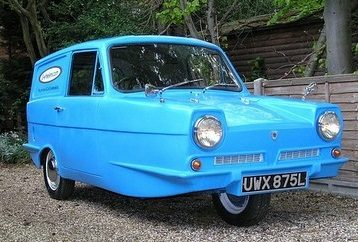


Projet effectué par :
 - Aymeric Tran
 - Julien Khalifa
 - Merwane Difallah

Ce dataset/jeu de donnée spécifie toutes les informations des voitures renseigné.



*   Modèle
*   Marque
*   Prix
*   Année
*   Couleur extérieur/intérieur
*   Kilométrage
*   Moteur (divisé en 3 sous-parties)
*   Accident
*   Type de transmission
*   Type de carburant


Pour commencer nous avons nettoyé le Dataset en changeant principalement 4 paramètres :

 - Changer le prix en Euros et enlever les tout signes.
 - Changer le kilometrage passant de Miles à Kilometre et enlever les tout signes.
 - Diviser la colonne moteur en 3 sous catégorie (Chevaux, Cylindré, Litres)
 - Accident en changeant les données par des valeurs, 1 = accident et 0 = rien





In [96]:
import pandas as pd
import numpy as nump
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

cars_df = read_csv("/content/voiture_seconde_main.csv")


In [97]:

csv_path = '/content/voiture_seconde_main.csv'
cars_df = pd.read_csv(csv_path)

new_order = ['modele', 'marque', 'prix', 'annee_du_modele',
             'couleur_exterieure', 'couleur_interieure', 'kilometrage',
             'moteur', 'accident', 'type_transmission_moteur', 'type_carburant']

cars_df = cars_df[new_order]

output_csv_path = '/content/voiture_seconde_main_modifie.csv'
cars_df.to_csv(output_csv_path, index=False)

cars_df.head()

,modele,marque,prix,annee_du_modele,couleur_exterieure,couleur_interieure,kilometrage,moteur,accident,type_transmission_moteur,type_carburant
0,Utility Police Interceptor Base,Ford,"$10,300",2013,Black,Black,"51,000 mi.",300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,6-Speed A/T,E85 Flex Fuel
1,Palisade SEL,Hyundai,"$38,005",2021,Moonlight Cloud,Gray,"34,742 mi.",3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,8-Speed Automatic,Gasoline
2,RX 350 RX 350,Lexus,"$54,598",2022,Blue,Black,"22,372 mi.",3.5 Liter DOHC,None reported,Automatic,Gasoline
3,Q50 Hybrid Sport,INFINITI,"$15,500",2015,Black,Black,"88,900 mi.",354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,7-Speed A/T,Hybrid
4,Q3 45 S line Premium Plus,Audi,"$34,999",2021,Glacier White Metallic,Black,"9,835 mi.",2.0L I4 16V GDI DOHC Turbo,None reported,8-Speed Automatic,Gasoline


In [98]:
import pandas as pd

def miles_to_kilometers(miles):
    try:
        miles_cleaned = miles.replace(",", "").replace(" mi.", "")
        kilometers = float(miles_cleaned) * 1.600
        return round(kilometers, 2)
    except ValueError:
        return None

def remove(string):
    return string.replace("$", "").replace(",", "")

def accident_replace(accident):
    if isinstance(accident, str):
        return accident.replace("At least 1 accident or damage reported", "1").replace("None reported", "0")
    else:
        return accident

df = pd.read_csv('voiture_seconde_main_modifie.csv')

df['prix'] = df['prix'].apply(remove)
elements_prix = df['prix'].unique()
df['kilometrage'] = df['kilometrage'].apply(miles_to_kilometers)
df['accident'] = df['accident'].apply(accident_replace)

elements_kilometrage = df['kilometrage'].unique()
output_csv_path = 'voiture_seconde_main_modifie.csv'
df.to_csv(output_csv_path, index=False)
print("\nLes 5 premières lignes du DataFrame modifié : \n")
print(df.head())



Les 5 premières lignes du DataFrame modifié : 

                            modele    marque   prix  annee_du_modele  \
0  Utility Police Interceptor Base      Ford  10300             2013   
1                     Palisade SEL   Hyundai  38005             2021   
2                    RX 350 RX 350     Lexus  54598             2022   
3                 Q50 Hybrid Sport  INFINITI  15500             2015   
4        Q3 45 S line Premium Plus      Audi  34999             2021   

       couleur_exterieure couleur_interieure  kilometrage  \
0                   Black              Black      81600.0   
1         Moonlight Cloud               Gray      55587.2   
2                    Blue              Black      35795.2   
3                   Black              Black     142240.0   
4  Glacier White Metallic              Black      15736.0   

                                              moteur accident  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        1   
1                    

In [99]:
import pandas as pd
import re
import webcolors

df = pd.read_csv('voiture_seconde_main_modifie.csv')

fossil_fuel_terms = ['plug-in', 'cylinder', 'fuel', 'gas', 'gasoline', 'flex', 'turbo']

df['hybride'] = (
    df['moteur'].str.contains('hybrid', case=False, na=False) |
    ((df['moteur'].str.contains('electric', case=False, na=False) &
      df['moteur'].str.contains('|'.join(fossil_fuel_terms), case=False, na=False)))
).astype(int)


df['Puissance ch'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)HP').astype(float)
df['Litres'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)\s*(?:L|liter)').astype(float)
df['Cylindré'] = None

patterns = [r'V(\d+)', r'W(\d+)', r'(\d+)\s*cylinder']

for index, row in df.iterrows():
    for pattern in patterns:
        match = re.search(pattern, row['moteur'], flags=re.IGNORECASE)
        if match:
            df.at[index, 'Cylindré'] = match.group(1)
            break
df['Cylindré'] = pd.to_numeric(df['Cylindré'], errors='coerce')

def color_to_rgb(color_name):
    try:
        rgb_tuple = webcolors.name_to_rgb(color_name)
        return f"RGB({rgb_tuple[0]}, {rgb_tuple[1]}, {rgb_tuple[2]})"
    except ValueError:
        words = color_name.split()
        rgb_values = []

        for word in words:
            try:
                rgb_tuple = webcolors.name_to_rgb(word)
                rgb_values.append(f"{rgb_tuple[0]}, {rgb_tuple[1]}, {rgb_tuple[2]}")
            except ValueError:
                continue

        if rgb_values:
            return ", ".join(rgb_values)
        else:
            return "N/A"
df['RGB'] = df['couleur_exterieure'].apply(color_to_rgb)
output_csv_path = '/content/voiture_seconde_main_modifie.csv'
df.to_csv(output_csv_path, index=False)

In [100]:
import pandas as pd

def modify_transmission(string):
    string = string.replace("Automatic", "A/T").replace("Manual", "M/T").replace("Spd", "Speed").replace("AT", "A/T")
    if any(word in string for word in ["", "-Speed", "with"]):
        string_parts = string.split()
        transmission_type = next((t for t in string_parts if 'A/T' in t or 'M/T' in t), '')
        speed = next((s.strip('-Speed') if '-Speed' in s else 'N/A' for s in string_parts), '')
        other_info = ' '.join(s for s in string_parts if s not in [speed, transmission_type])

        if speed and other_info:
            if f"{speed}-Speed" in other_info:
                other_info = other_info.replace(f"{speed}-Speed", "", 1)
            string = f"{transmission_type}, {speed}-Speed, {other_info}"
        elif speed:
            string = f"{transmission_type}, {speed}-Speed"
        else:
            string = f"{transmission_type}, {other_info}"

    return string

df = pd.read_csv('voiture_seconde_main_modifie.csv')

df['type_transmission_moteur'] = df['type_transmission_moteur'].apply(lambda x: modify_transmission(x) if any(word in x for word in ["", "-Speed", "with"]) else x)

output_csv_path = 'voiture_seconde_main_modifie.csv'
df.to_csv(output_csv_path, index=False)


In [101]:
import pandas as pd


df = pd.read_csv('voiture_seconde_main_modifie.csv')
unique_accident_values = df['moteur'].unique()
print("Valeurs uniques dans la colonne 'moteur':")
print(unique_accident_values)

Valeurs uniques dans la colonne 'moteur':
['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC' ...
 '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel'
 '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel']


In [102]:


import pandas as pd
import re

df = pd.read_csv('voiture_seconde_main_modifie.csv')


df['Cylindré'] = None

patterns = [r'V(\d+)', r'W(\d+)', r'(\d+)\s*cylinder']

for index, row in df.iterrows():
    for pattern in patterns:
        match = re.search(pattern, row['moteur'], flags=re.IGNORECASE)
        if match:
            df.at[index, 'Cylindré'] = match.group(1)
            break

df['Cylindré'] = pd.to_numeric(df['Cylindré'], errors='coerce')
df.to_csv('voiture_seconde_main_modifie.csv', index=False)

print(df[['moteur', 'Cylindré']])

                                                 moteur  Cylindré
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...       6.0
1                                  3.8L V6 24V GDI DOHC       6.0
2                                        3.5 Liter DOHC       NaN
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...       6.0
4                            2.0L I4 16V GDI DOHC Turbo       NaN
...                                                 ...       ...
4004                   6.0L W12 48V PDI DOHC Twin Turbo      12.0
4005      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel       6.0
4006                                           Electric       NaN
4007      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel       6.0
4008       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       4.0

[4009 rows x 2 columns]


Après avoir néttoyé notre Dataset/jeu de donnée nous pouvons procéder à notre modélisation EDA :

In [103]:

import pandas as pd

df = pd.read_csv('voiture_seconde_main_modifie.csv')

df['Puissance ch'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)HP').astype(float)

df['Litres'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)\s*(?:L|liter)').astype(float)

print(df[['moteur', 'Puissance ch', 'Litres']])
df.to_csv('voiture_seconde_main_modifie.csv', index=False)


                                                 moteur  Puissance ch  Litres
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...         300.0     3.7
1                                  3.8L V6 24V GDI DOHC           NaN     3.8
2                                        3.5 Liter DOHC           NaN     3.5
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...         354.0     3.5
4                            2.0L I4 16V GDI DOHC Turbo           NaN     2.0
...                                                 ...           ...     ...
4004                   6.0L W12 48V PDI DOHC Twin Turbo           NaN     6.0
4005      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel         349.0     3.0
4006                                           Electric           NaN     NaN
4007      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel         450.0     3.5
4008       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         248.0     2.0

[4009 rows x 3 columns]


In [104]:

import pandas as pd
elec_df = pd.read_csv('voiture_seconde_main_modifie.csv')
fossil_fuel_terms = ['fuel', 'gas', 'gasoline', 'flex', 'turbo']

elec_df['Full electric'] = (df['moteur'].str.contains('electric', case=False, na=False) & ~df['moteur'].str.contains('|'.join(fossil_fuel_terms), case=False, na=False)).astype(int)

output_csv_path = 'voiture_seconde_main_modifie.csv'
elec_df.to_csv(output_csv_path)

print(elec_df[['moteur', 'Full electric']])
total_count = elec_df.shape[1]
print(f"Compte total : {total_count}")


                                                 moteur  Full electric
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...              0
1                                  3.8L V6 24V GDI DOHC              0
2                                        3.5 Liter DOHC              0
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...              0
4                            2.0L I4 16V GDI DOHC Turbo              0
...                                                 ...            ...
4004                   6.0L W12 48V PDI DOHC Twin Turbo              0
4005      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel              0
4006                                           Electric              1
4007      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel              0
4008       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel              0

[4009 rows x 2 columns]
Compte total : 17


In [105]:

import pandas as pd


df = pd.read_csv('voiture_seconde_main_modifie.csv')

fossil_fuel_terms = ['plug-in', 'cylinder', 'fuel', 'gas', 'gasoline']

df['hybride'] = (
    df['moteur'].str.contains('hybrid', case=False, na=False) |
    ((df['moteur'].str.contains('electric', case=False, na=False) &
      df['moteur'].str.contains('|'.join(fossil_fuel_terms), case=False, na=False)))
).astype(int)


print(df[['moteur', 'hybride']])

output_csv_path = 'voiture_seconde_main_modifie.csv'
df.to_csv(output_csv_path)

total_count = df.shape[1]
print(f"Compte total : {total_count}")

                                                 moteur  hybride
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        0
1                                  3.8L V6 24V GDI DOHC        0
2                                        3.5 Liter DOHC        0
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        1
4                            2.0L I4 16V GDI DOHC Turbo        0
...                                                 ...      ...
4004                   6.0L W12 48V PDI DOHC Twin Turbo        0
4005      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel        0
4006                                           Electric        0
4007      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel        0
4008       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel        0

[4009 rows x 2 columns]
Compte total : 18


In [106]:

import pandas as pd
import webcolors
df = pd.read_csv('voiture_seconde_main_modifie.csv')
def color_to_rgb(color_name):
    try:
        rgb_tuple = webcolors.name_to_rgb(color_name)
        return f"RGB({rgb_tuple[0]}, {rgb_tuple[1]}, {rgb_tuple[2]})"
    except ValueError:
        words = color_name.split()
        rgb_values = []

        for word in words:
            try:
                rgb_tuple = webcolors.name_to_rgb(word)
                rgb_values.append(f"{rgb_tuple[0]}, {rgb_tuple[1]}, {rgb_tuple[2]}")
            except ValueError:
                continue

        if rgb_values:
            return ", ".join(rgb_values)
        else:
            return "N/A"
df['RGB'] = df['couleur_exterieure'].apply(color_to_rgb)
pd.set_option('display.max_rows', None)
print(df[['couleur_exterieure', 'RGB']])
pd.reset_option('display.max_rows')
df.to_csv('voiture_seconde_main_modifie.csv', index=False)


                           couleur_exterieure                           RGB
0                                       Black                  RGB(0, 0, 0)
1                             Moonlight Cloud                           N/A
2                                        Blue                RGB(0, 0, 255)
3                                       Black                  RGB(0, 0, 0)
4                      Glacier White Metallic                 255, 255, 255
5                                      Silver            RGB(192, 192, 192)
6                                        Blue                RGB(0, 0, 255)
7                                       Green                RGB(0, 128, 0)
8                                       Black                  RGB(0, 0, 0)
9                                       Black                  RGB(0, 0, 0)
10                                 Fuji White                 255, 255, 255
11                                     Silver            RGB(192, 192, 192)
12          

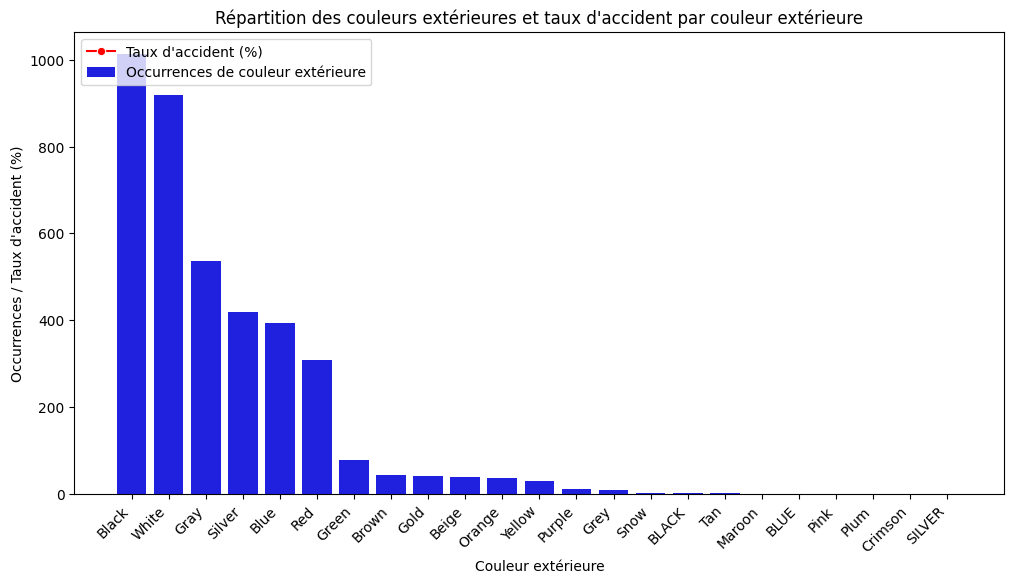

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webcolors


df = pd.read_csv('voiture_seconde_main_modifie.csv')

def extract_color(word_list):
    for word in word_list:
        try:
            webcolors.name_to_rgb(word)
            return word
        except ValueError:
            continue
    return None

df['Couleur_exterieure_simple'] = df['couleur_exterieure'].apply(lambda x: extract_color(x.split()))
color_counts = df['Couleur_exterieure_simple'].value_counts()
colors_df = pd.DataFrame({'Couleur_exterieure': color_counts.index, 'Occurences': color_counts.values})
colors_df = colors_df.sort_values(by='Occurences', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=colors_df['Couleur_exterieure'], y=colors_df['Occurences'], color='blue', label='Occurrences de couleur extérieure')
sns.lineplot(x=colors_df['Couleur_exterieure'], y=df.groupby('Couleur_exterieure_simple')['accident'].mean() * 100, color='red', label='Taux d\'accident (%)', marker='o')
plt.xlabel('Couleur extérieure')
plt.ylabel('Occurrences / Taux d\'accident (%)')
plt.title('Répartition des couleurs extérieures et taux d\'accident par couleur extérieure')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')

plt.show()

<ipython-input-108-1a777ac4a026>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


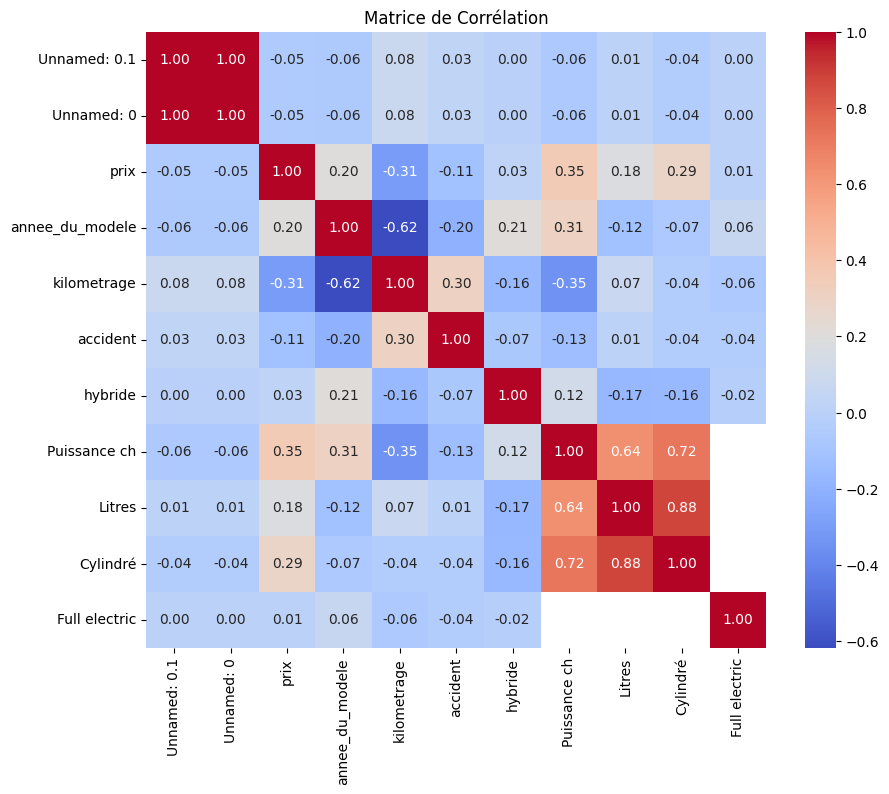

In [108]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


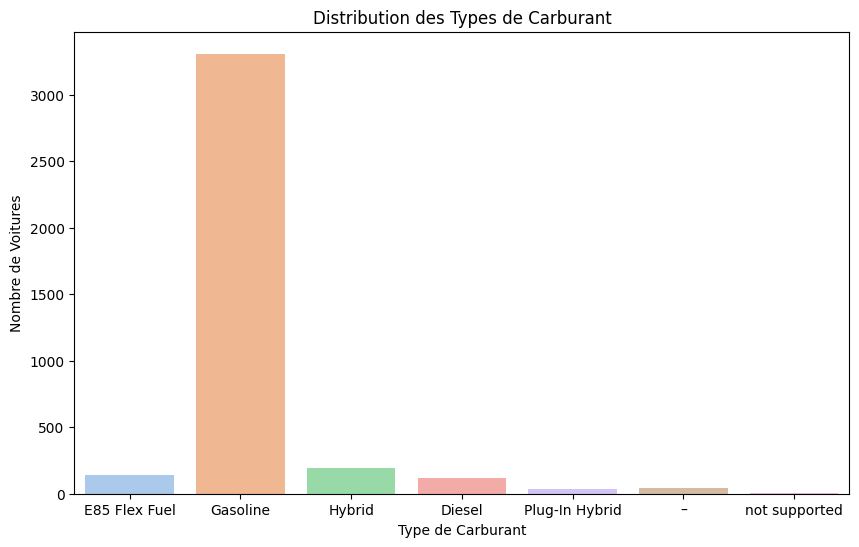

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_carburant', data=df, palette='pastel')
plt.title('Distribution des Types de Carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Nombre de Voitures')
plt.show()


<ipython-input-110-ea7812d37ddc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['kilometrage'] = pd.to_numeric(cars_df['kilometrage'].astype(str).str.replace(',', '').str.replace(' mi.', ''), errors='coerce')
<ipython-input-110-ea7812d37ddc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars_df['prix'] = pd.to_numeric(cars_df['prix'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')


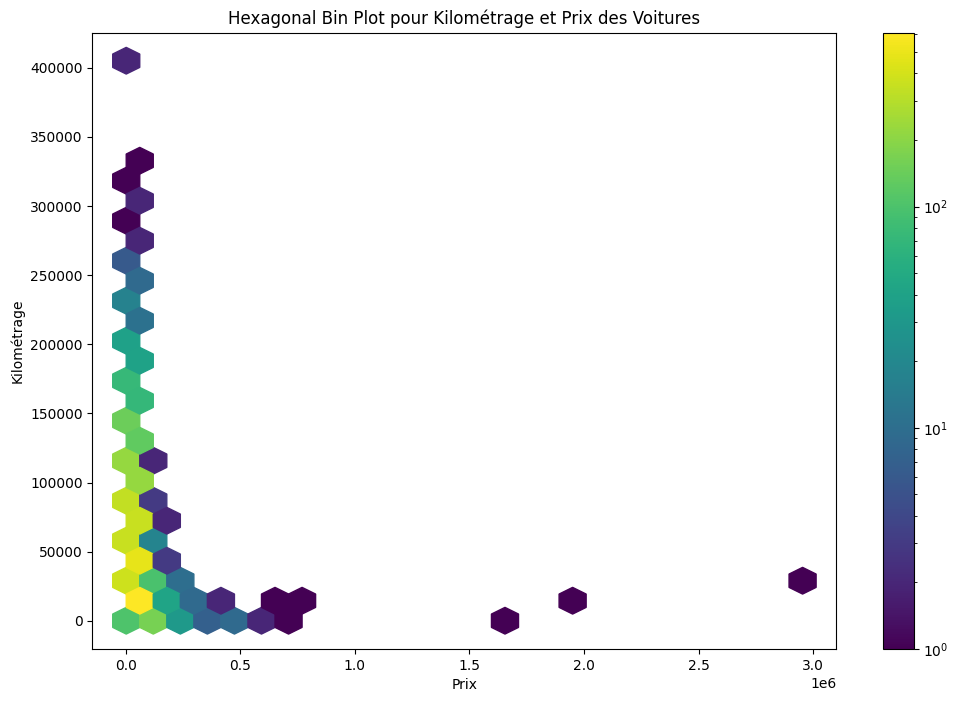

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
cars_df['kilometrage'] = pd.to_numeric(cars_df['kilometrage'].astype(str).str.replace(',', '').str.replace(' mi.', ''), errors='coerce')
cars_df['prix'] = pd.to_numeric(cars_df['prix'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
plt.figure(figsize=(12, 8))
plt.hexbin(x=cars_df['prix'], y=cars_df['kilometrage'], gridsize=25, cmap='viridis', norm=LogNorm(), mincnt=1)
plt.colorbar()
plt.title('Hexagonal Bin Plot pour Kilométrage et Prix des Voitures')
plt.xlabel('Prix')
plt.ylabel('Kilométrage')
plt.show()


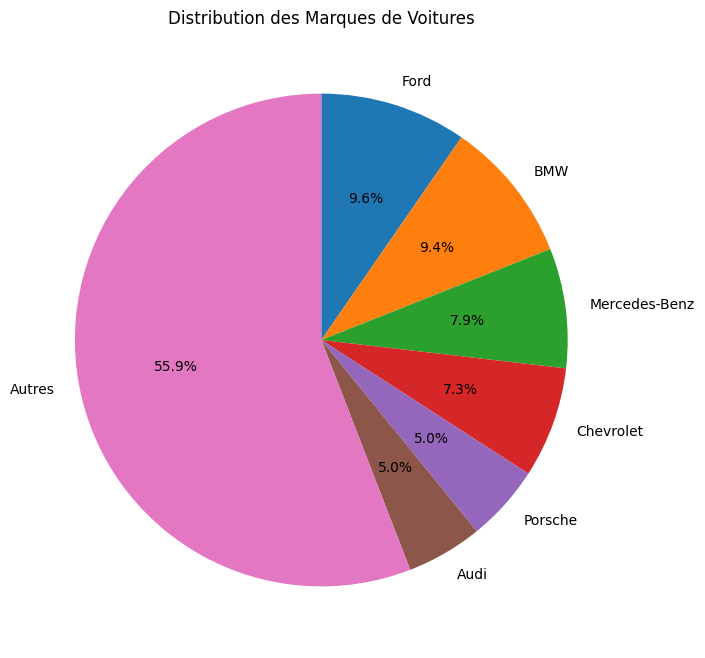

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
marque_counts = df['marque'].value_counts()
top_marques = marque_counts.head(6)
autres_marques = marque_counts[6:].sum()
data_pie = pd.concat([top_marques, pd.Series({'Autres': autres_marques})])
plt.figure(figsize=(12, 8))
data_pie.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution des Marques de Voitures')
plt.ylabel('')
plt.show()


<ipython-input-112-9e4b0731a85b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['kilometrage'] = pd.to_numeric(cars_df['kilometrage'].astype(str).str.replace(',', '').str.replace(' mi.', ''), errors='coerce')
<ipython-input-112-9e4b0731a85b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars_df['prix'] = pd.to_numeric(cars_df['prix'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the s

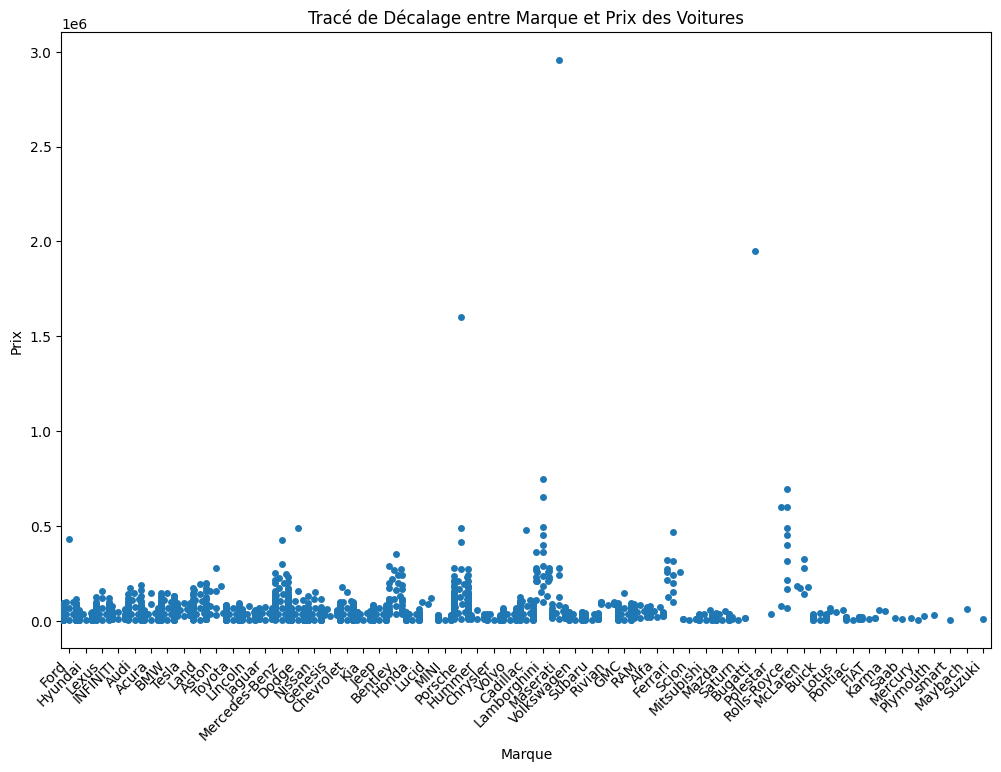

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cars_df['kilometrage'] = pd.to_numeric(cars_df['kilometrage'].astype(str).str.replace(',', '').str.replace(' mi.', ''), errors='coerce')
cars_df['prix'] = pd.to_numeric(cars_df['prix'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
plt.figure(figsize=(12, 8))
sns.swarmplot(x='marque', y='prix', data=cars_df)
plt.title('Tracé de Décalage entre Marque et Prix des Voitures')
plt.xlabel('Marque')
plt.ylabel('Prix')
plt.xticks(rotation=45, ha='right')
plt.show()


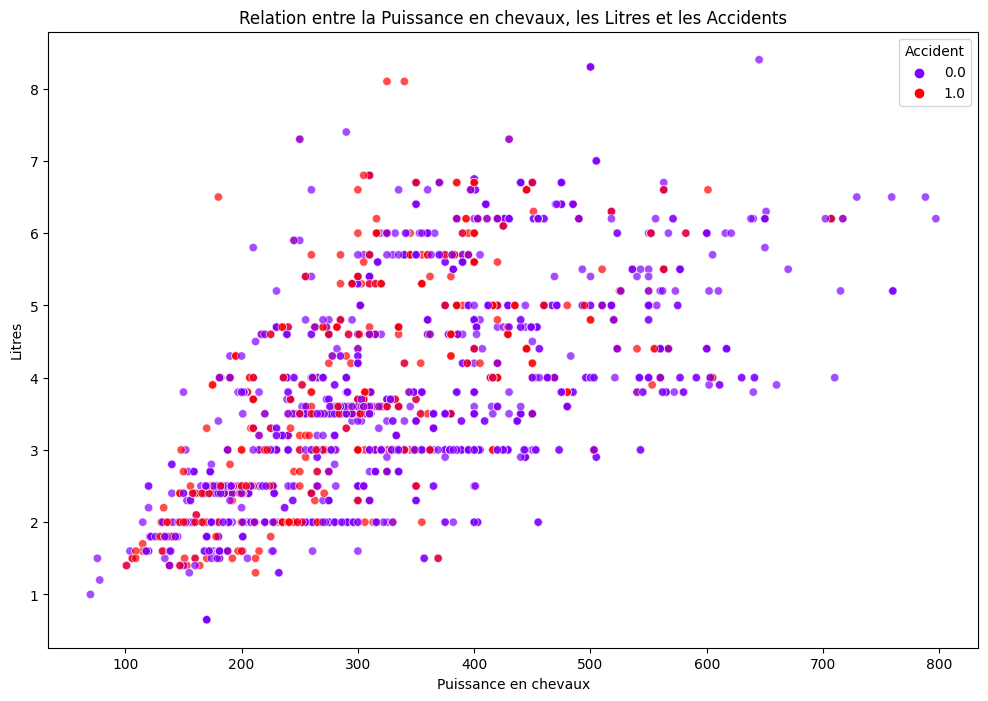

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('voiture_seconde_main_modifie.csv')

df['Puissance ch'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)HP').astype(float)


df['Litres'] = df['moteur'].str.extract(r'(\d+\.\d*|\d+)\s*(?:L|liter)').astype(float)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Puissance ch', y='Litres', hue='accident', data=df, palette='rainbow', alpha=0.7, edgecolor='w', linewidth=0.5)


plt.xlabel('Puissance en chevaux')
plt.ylabel('Litres')
plt.title('Relation entre la Puissance en chevaux, les Litres et les Accidents')
plt.legend(title='Accident', loc='upper right')

plt.show()


# **Régression**

Maintenant nous passons à la régression du Dataset pour pouvoir prédire le prix de l'assurance en fonction de la voiture choisis.

Nous avons pris en compte pour le prix de l'assurance :
 - Marque
 - Année de modèle
 - Moteur
 - Kilométrage
 - Accident
 - Couleur extérieur
 - Prix de la voiture


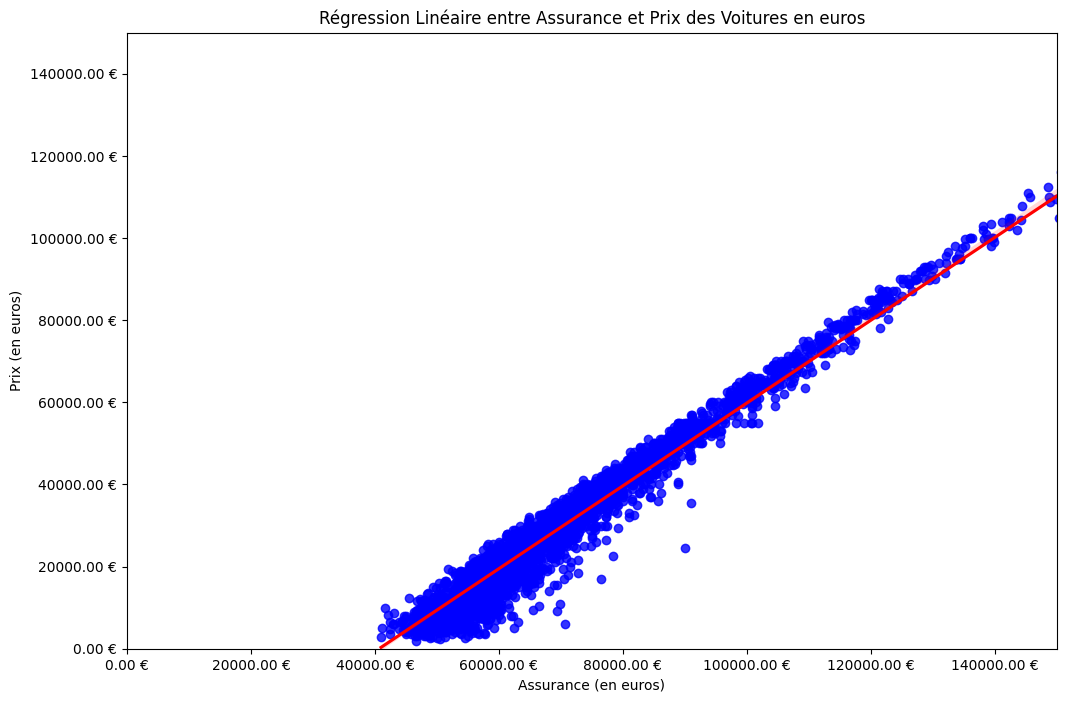

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('voiture_seconde_main_modifie.csv')


df['assurance'] = (
    100 +
    0.05 * df['kilometrage'] +
    10 * df['Puissance ch'] +
    5 * df['Litres'] +
    10 * df['Cylindré'] +
    15 * df['annee_du_modele'] +
    8 * df['accident'] +
    15 * df['marque'].astype('category').cat.codes +
    5 * df['couleur_exterieure'].astype('category').cat.codes +
    df['prix']
)


def euros_formatter(x, _):
    return f"{x:.2f} €"

plt.figure(figsize=(12, 8))
sns.regplot(x='assurance', y='prix', data=df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})


plt.gca().yaxis.set_major_formatter(FuncFormatter(euros_formatter))
plt.gca().xaxis.set_major_formatter(FuncFormatter(euros_formatter))

plt.ylim(0, 150000)
plt.xlim(0, 150000)

plt.title(f'Régression Linéaire entre Assurance et Prix des Voitures en euros')
plt.xlabel('Assurance (en euros)')
plt.ylabel('Prix (en euros)')

plt.show()


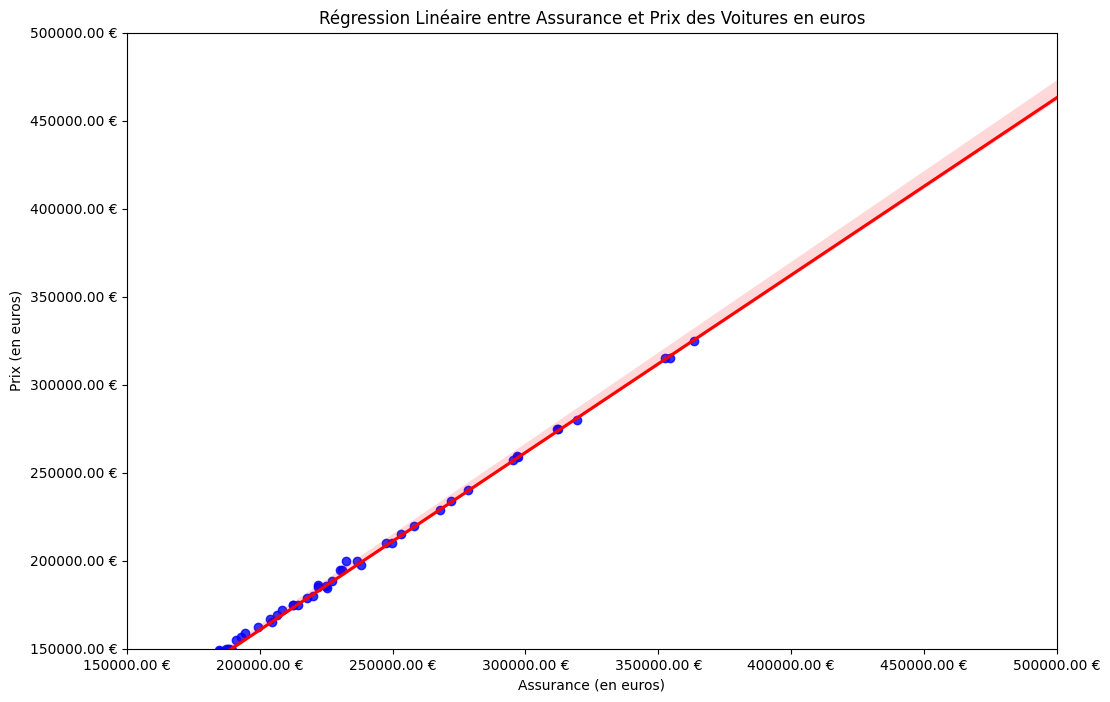

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('voiture_seconde_main_modifie.csv')


df['assurance'] = (
    100 +
    0.05 * df['kilometrage'] +
    10 * df['Puissance ch'] +
    5 * df['Litres'] +
    10 * df['Cylindré'] +
    15 * df['annee_du_modele'] +
    8 * df['accident'] +
    15 * df['marque'].astype('category').cat.codes +
    5 * df['couleur_exterieure'].astype('category').cat.codes +
    df['prix']
)


def euros_formatter(x, _):
    return f"{x:.2f} €"

plt.figure(figsize=(12, 8))
sns.regplot(x='assurance', y='prix', data=df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})


plt.gca().yaxis.set_major_formatter(FuncFormatter(euros_formatter))
plt.gca().xaxis.set_major_formatter(FuncFormatter(euros_formatter))

plt.ylim(150000,500000)
plt.xlim(150000,500000)

plt.title(f'Régression Linéaire entre Assurance et Prix des Voitures en euros')
plt.xlabel('Assurance (en euros)')
plt.ylabel('Prix (en euros)')

plt.show()


In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

def hyperparameter_tuning(model, param_dist, X_train, y_train, n_iter=10, cv=5, scoring='neg_mean_squared_error'):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter, cv=cv,
                                       scoring=make_scorer(scoring, greater_is_better=False), random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_


In [117]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

df = pd.read_csv('voiture_seconde_main_modifie.csv')

df['prix'] = df['prix'].apply(lambda x: min(x, 50000))

features = ['Puissance ch', 'accident', 'Cylindré']
X = df[features]
y = df['prix']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (Régression) : {mse:.2f}')
print(f'R-carré (Régression) : {r2:.2f}')


Erreur quadratique moyenne (Régression) : 128963969.39
R-carré (Régression) : 0.45


#Train Test Split

Train score: 0.20885540552224546
Test score: 0.2190885621155566


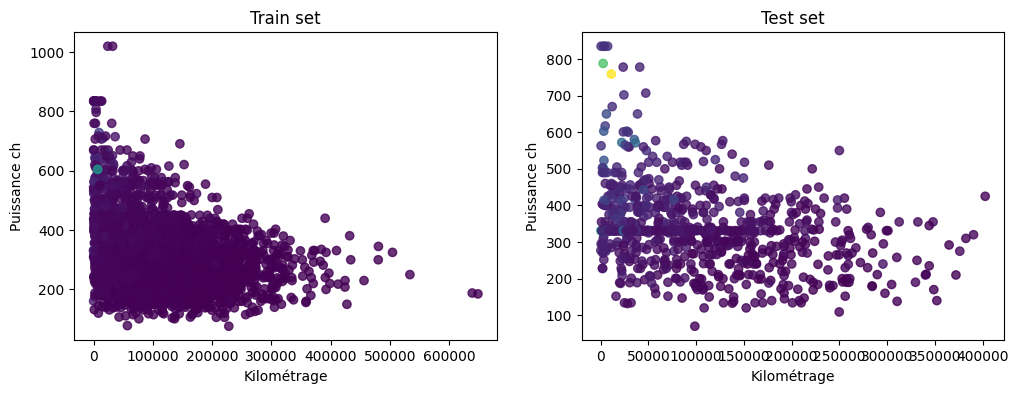

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('voiture_seconde_main_modifie.csv')

y = df['prix']
X = df[['kilometrage', 'Puissance ch']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train_imputed[:, 0], X_train_imputed[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.xlabel('Kilométrage')
plt.ylabel('Puissance ch')

model = KNeighborsRegressor(n_neighbors=11)

model.fit(X_train_imputed, y_train)

train_score = model.score(X_train_imputed, y_train)
print('Train score:', train_score)

X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)
test_score = r2_score(y_test, y_pred)
print('Test score:', test_score)

plt.subplot(122)
plt.scatter(X_test_imputed[:, 0], X_test_imputed[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.xlabel('Kilométrage')
plt.ylabel('Puissance ch')

plt.show()

#Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_csv('voiture_seconde_main_modifie.csv')

y = df['prix']
X = df[['kilometrage', 'Puissance ch']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_imputed, y, cv=kf, scoring='r2')

print('Cross-validated R2 scores:', cv_scores)

print('Mean R2 score:', np.mean(cv_scores))


Cross-validated R2 scores: [0.05496003 0.25799502 0.30566505 0.23762552 0.28470234]
Mean R2 score: 0.2281895915437465


#Grid Search

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_imputed, y)

print("Meilleurs hyperparamètres:", grid_search.best_params_)

Meilleurs hyperparamètres: {'max_depth': 10, 'n_estimators': 100}


#Learning Curve

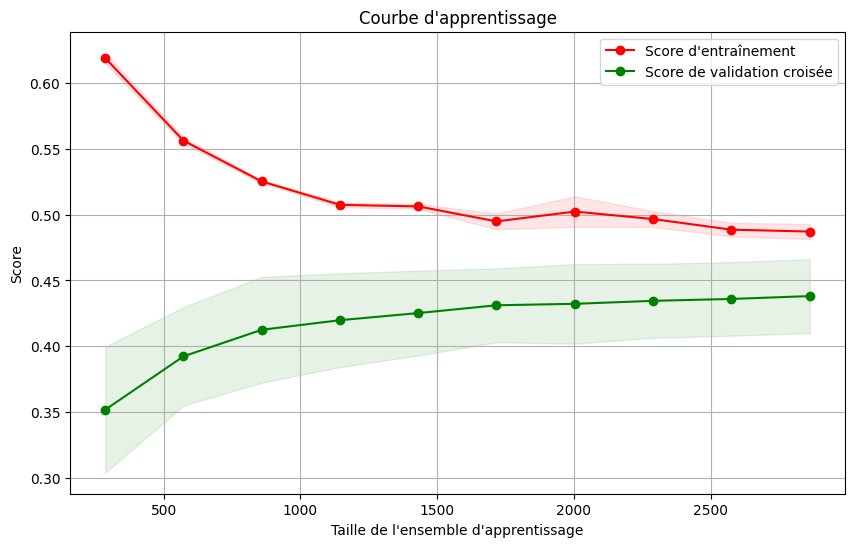

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
cars_df = pd.read_csv('voiture_seconde_main_modifie.csv')

def detect_outliers_mad(data, threshold=3.0):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    threshold_value = threshold * mad
    outliers = data[np.abs(data - median) > threshold_value]
    return outliers

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Courbe d'apprentissage")
    plt.xlabel("Taille de l'ensemble d'apprentissage")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")

    plt.legend(loc="best")
    plt.show()

X = cars_df[['kilometrage']]
y = cars_df['prix']

outliers = detect_outliers_mad(y, threshold=3.0)
X = X[~y.isin(outliers)]
y = y[~y.isin(outliers)]

estimator = RandomForestRegressor(max_depth=5, n_estimators=100)

plot_learning_curve(estimator, X, y, cv=5)

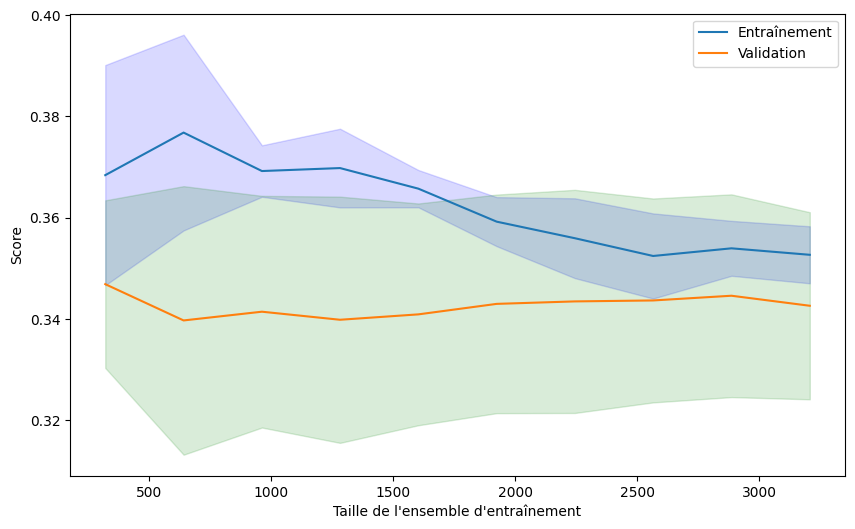

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

df = pd.read_csv('voiture_seconde_main_modifie.csv')


imputer = SimpleImputer(strategy='mean')
X = df[['Puissance ch', 'accident', 'Cylindré']]
X_imputed = imputer.fit_transform(X)

df['prix'] = df['prix'].apply(lambda x: min(x, 50000))
y = df['prix']

best_model = RandomForestRegressor(n_estimators=10, max_depth=1)

N, train_score, val_score = learning_curve(best_model, X_imputed, y, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis=1), label='Entraînement')
plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.fill_between(N, train_score.mean(axis=1) - train_score.std(axis=1), train_score.mean(axis=1) + train_score.std(axis=1), alpha=0.15, color='blue')
plt.fill_between(N, val_score.mean(axis=1) - val_score.std(axis=1), val_score.mean(axis=1) + val_score.std(axis=1), alpha=0.15, color='green')

plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.legend()
plt.show()


In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


df = pd.read_csv('voiture_seconde_main_modifie.csv')


features = ['annee_du_modele', 'kilometrage', 'Puissance ch', 'Litres', 'Cylindré', 'hybride', 'type_carburant', 'accident']
target = 'prix'


X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['annee_du_modele', 'kilometrage', 'Puissance ch', 'Litres', 'Cylindré']),
        ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), ['hybride', 'type_carburant', 'accident'])
    ])


model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, max_depth=10))


model.fit(X_train, y_train)


exemple_voiture = X_test.iloc[0:1]
prix_predit = model.predict(exemple_voiture)

print(f'Prix prédit de la voiture d\'occasion : {prix_predit[0]:.2f}')


Prix prédit de la voiture d'occasion : 28477.25
